In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.gridspec as gridspec
import math
from os import listdir
from os.path import isfile, join

In [193]:
specs = dict()
specs["Aleks"] = "13th Gen Intel(R) Core(TM) i9-13900H, 2600 Mhz"
specs["Aleks2"] = "13th Gen Intel(R) Core(TM) i9-13900H, 2600 Mhz"
specs["Oliver"] = "12th Gen Intel(R) Core(TM) i7-12700H 2.30 GHz"
specs["Philippa"] = "AMD Ryzen 3 5300U with Radeon Graphics 2.60 GHz"
specs["Dani"] = "13th Gen Intel(R) Core(TM) i5 with irisXE graphics"
specs["Dani_Macbook"] = "Intel(R) Core(TM) i7 with intel UHD graphics"

In [194]:
mypath= "."
csvfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f[-4:]==".csv")]
csvfiles

['CPU_results.csv', 'T4 GPU_results.csv', 'v2-8TPU_results.csv']

In [195]:
df = None
dfs = []

for csvfile in csvfiles:
    new_df = pd.read_csv(csvfile)
    print(f"{csvfile}:\t{len(new_df)}")

    if df is None:
        df = new_df
    else:
        df = pd.concat([df, new_df], ignore_index=True)

    dfs.append(new_df)

    print(len(df))

df

CPU_results.csv:	88
88
T4 GPU_results.csv:	155
243
v2-8TPU_results.csv:	228
471


,Unnamed: 0,model,batch_size,epochs,dataset_size,time_to_train,time_to_retrain,time_to_predict,accuracy,name
0,0,RNN,128,1,15000,5.980387,1.944834,2.640631,0.6854,CPU
1,1,FNN,128,1,15000,6.487350,3.611307,1.880776,0.8771,CPU
2,2,CNN,128,1,15000,11.686775,11.023209,2.212437,0.9295,CPU
3,3,RNN,128,1,18000,5.651518,2.535644,2.633894,0.6683,CPU
4,4,FNN,128,1,18000,5.617067,4.915249,2.607150,0.8921,CPU
...,...,...,...,...,...,...,...,...,...,...
466,223,FNN,128,1,59400,16.379277,14.366546,0.986113,0.9167,v2-8TPU
467,224,CNN,128,1,59400,31.240113,29.787972,1.852829,0.9744,v2-8TPU
468,225,RNN,128,1,60000,6.880401,4.323996,1.315577,0.8792,v2-8TPU
469,226,FNN,128,1,60000,16.410948,14.567176,1.067999,0.9173,v2-8TPU


In [196]:
def filter_df_by_column_std(df, column):
    filtered_df = None
    for name in df.name.unique():
        for model in df.model.unique():
            tdf = df[(df.name == name) & (df.model == model)]
            std = tdf[column].std()
            mean = tdf[column].mean()
        
            upper_bound = mean + (1.5*std)
            lower_bound = mean - (1.5*std)
        
            fdf = tdf[(lower_bound <= tdf[column]) & (tdf[column] <= upper_bound)]

            if filtered_df is None:
                filtered_df = fdf.copy()
            else:
                filtered_df = pd.concat([filtered_df, fdf], ignore_index=True)
                
    return filtered_df

In [197]:
filtered_df = filter_df_by_column_std(df, "time_to_train")
filtered_df = filter_df_by_column_std(filtered_df, "time_to_retrain")
filtered_df = filter_df_by_column_std(filtered_df, "time_to_predict")

for i in range(len(dfs)):
    dfs[i] = filter_df_by_column_std(dfs[i], "time_to_train")
    dfs[i] = filter_df_by_column_std(dfs[i], "time_to_retrain")
    dfs[i] = filter_df_by_column_std(dfs[i], "time_to_predict")

In [198]:
filtered_df.columns

Index(['Unnamed: 0', 'model', 'batch_size', 'epochs', 'dataset_size',
       'time_to_train', 'time_to_retrain', 'time_to_predict', 'accuracy',
       'name'],
      dtype='object')

(array([69., 69., 69., 63., 46., 46., 40., 23., 23., 23.]),
 array([  0. ,  22.7,  45.4,  68.1,  90.8, 113.5, 136.2, 158.9, 181.6,
        204.3, 227. ]),
 <BarContainer object of 10 artists>)

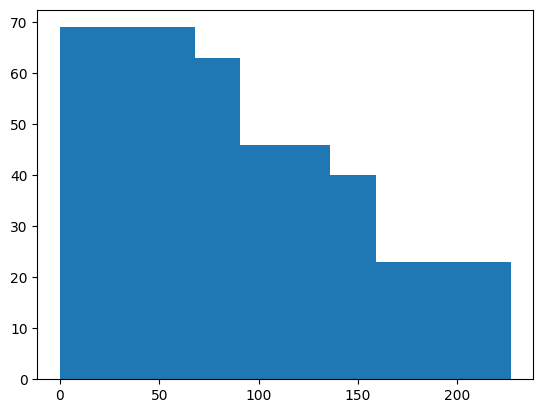

In [199]:
plt.hist(df['Unnamed: 0'])

(array([60., 48., 60., 48., 60., 48., 56., 27., 34., 30.]),
 array([15000., 19500., 24000., 28500., 33000., 37500., 42000., 46500.,
        51000., 55500., 60000.]),
 <BarContainer object of 10 artists>)

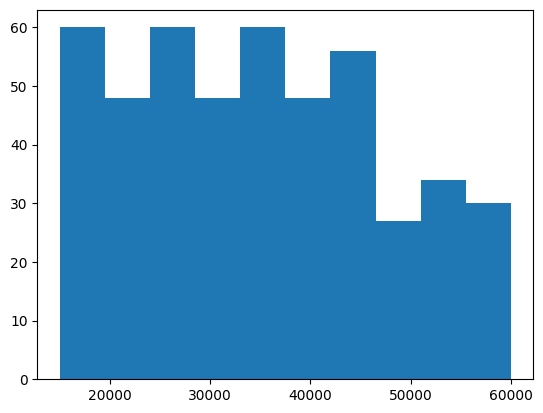

In [200]:
plt.hist(df.dataset_size)

43.0998375415802


(array([162.,  64.,  63.,  13.,  28.,  15.,   8.,   1.,   1.,   6.]),
 array([ 4.08827281,  7.98942928, 11.89058576, 15.79174223, 19.6928987 ,
        23.59405518, 27.49521165, 31.39636812, 35.2975246 , 39.19868107,
        43.09983754]),
 <BarContainer object of 10 artists>)

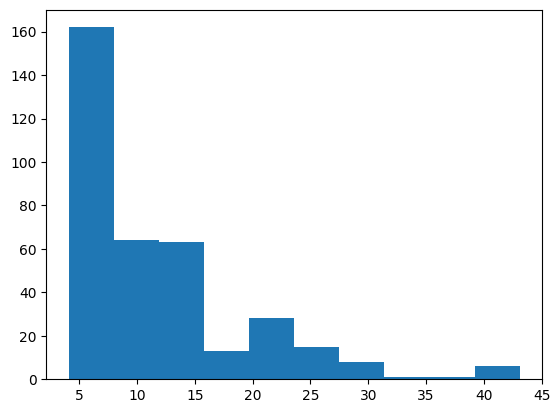

In [201]:
print(filtered_df["time_to_train"].max())
plt.hist(filtered_df["time_to_train"])

(array([191.,  41.,  51.,  22.,  23.,  12.,   8.,   0.,   0.,  13.]),
 array([ 0.60107303,  4.7230592 ,  8.84504538, 12.96703155, 17.08901772,
        21.2110039 , 25.33299007, 29.45497625, 33.57696242, 37.6989486 ,
        41.82093477]),
 <BarContainer object of 10 artists>)

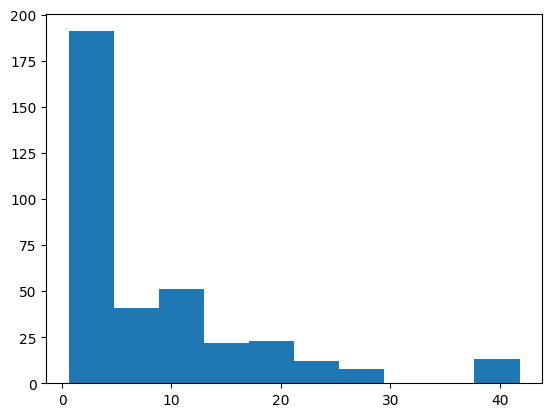

In [202]:
plt.hist(filtered_df["time_to_retrain"])

(array([ 89., 101.,  25.,  57.,  33.,   9.,  43.,   0.,   1.,   3.]),
 array([0.84515405, 1.11452549, 1.38389692, 1.65326836, 1.9226398 ,
        2.19201124, 2.46138268, 2.73075411, 3.00012555, 3.26949699,
        3.53886843]),
 <BarContainer object of 10 artists>)

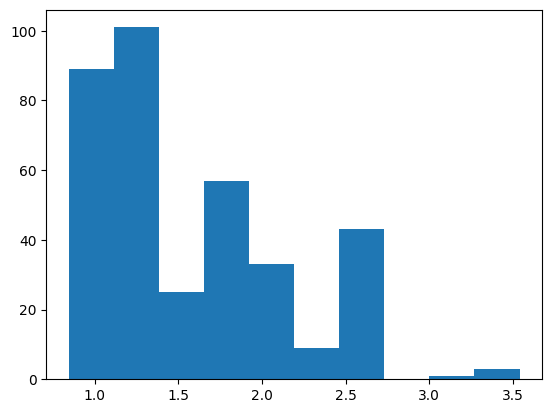

In [203]:
plt.hist(filtered_df["time_to_predict"])

In [204]:
def plot_by_col(x_col, y_col, c_col):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    handels = []
    labels = []
    
    for value in filtered_df[c_col].unique():
        dft = filtered_df[filtered_df[c_col] == value]
        handels.append(ax1.scatter(dft[x_col], dft[y_col]))
        labels.append(value)
    
    ax1.legend(handles=handels, labels=labels)
    fig.suptitle(f"{y_col} vs {x_col}")

In [205]:
def add_subplot(df, fig, x_col, y_col, c_col, xlim=None, ylim=None, plot="scatter"):

    num_axes = len(fig.axes)

    rows = cols = math.ceil(math.sqrt(num_axes + 1))

    gs = gridspec.GridSpec(rows, cols)

    for i in range(num_axes):
        fig.axes[i].set_position(gs[i].get_position(fig))
        fig.axes[i].set_subplotspec(gs[i])

    ax1 = fig.add_subplot(gs[num_axes])
    handels = []
    labels = []
    
    for value in df[c_col].unique():
        dft = df[df[c_col] == value]


        if plot == "scatter":
            scatter = ax1.scatter(dft[x_col], dft[y_col])
            handels.append(scatter)
            labels.append(value)

        elif plot == "lin_reg":
            x = dft[x_col]
            y = dft[y_col]

            coefs = np.polyfit(x, y, 1)
            x_input = np.linspace(x.min(), x.max(), 100)

            func = f"y = {coefs[0]:.2e}x + {coefs[1]:.2}"

            fit, =ax1.plot(x_input, np.polyval(coefs, x_input))

            handels.append(fit)
            labels.append(f"{value}: {func}")
        elif plot == "log_reg":
            x = dft[x_col]
            y = dft[y_col]

            coefs = np.polyfit(np.log(x), y, 1)
            x_input = np.linspace(x.min(), x.max(), 100)

            func = f"y = {coefs[0]:.2e}log(x) + {coefs[1]:.2}"

            fit, = ax1.plot(x_input, np.polyval(coefs, np.log(x_input)))

            handels.append(fit)
            labels.append(f"{value}: {func}")




    ax1.legend(handles=handels, labels=labels)

    if xlim is not None:
        ax1.set(xlim=xlim)

    if ylim is not None:
        ax1.set(ylim=ylim)

    ax1.set_title(f"{y_col} vs {x_col}")

In [206]:
def get_specs(name):
    if name in specs.keys():
        return specs[name]
    else:
        return f"Unknown System Specs ({name})"

In [207]:
def plot_model_comparisons(df_cur, title=None):

    if title is None:
        name = df_cur["name"][1]
        title = name#get_specs(name)
    
    fig = plt.figure(figsize=(12,10))
    fig.suptitle(title)
    fig.subplots_adjust(top=0.92)
    add_subplot(df_cur, fig, "dataset_size", "time_to_train", "model")
    add_subplot(df_cur, fig, "dataset_size", "time_to_predict", "model")
    add_subplot(df_cur, fig, "dataset_size", "time_to_retrain", "model")
    add_subplot(df_cur, fig, "accuracy", "time_to_train", "model")
    add_subplot(df_cur, fig, "accuracy", "time_to_predict", "model")
    add_subplot(df_cur, fig, "accuracy", "dataset_size", "model")
    fig

In [208]:
def plot_system_comparisons(df):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle("System Comparison")
    fig.subplots_adjust(top=0.92)
    add_subplot(df, fig, "dataset_size", "time_to_train", "name")
    add_subplot(df, fig, "time_to_predict", "time_to_train", "name")
    add_subplot(df, fig, "time_to_retrain", "time_to_train", "name")

    legend_ax = fig.add_subplot(224)

    legend_ax.axis("off")

    previous_legend = fig.axes[0].get_legend()

    handles = previous_legend.legend_handles
    labels = [get_specs(name.get_text()) for name in previous_legend.get_texts()]

    legend_ax.legend(handles=handles, labels=labels, loc="center")

    for ax in fig.axes[:-1]:
        ax.get_legend().remove()

    fig

In [ ]:
def plot_best_fit(df, title=None):
    if title is None:
        name = df["name"][1]
        title = get_specs(name)
    
    fig = plt.figure(figsize=(12,10))
    fig.suptitle(title)
    fig.subplots_adjust(top=0.92)
    add_subplot(df, fig, "dataset_size", "time_to_train", "model", plot="lin_reg")
    add_subplot(df, fig, "dataset_size", "time_to_predict", "model", plot="lin_reg")
    add_subplot(df, fig, "dataset_size", "time_to_retrain", "model", plot="lin_reg")
    add_subplot(df, fig, "dataset_size", "accuracy", "model", plot="log_reg")
    fig 

In [210]:
def print_confidence_interval(df, column, model):

    n = len(df[column])
    sample_mean = np.mean(df[column])
    sigma = np.std(df[column], ddof=1)


    alpha = 0.95
    # Define our z
    ci = alpha + (1-alpha)/2
    #Lower Interval, where n is sample siz
    c_lb = sample_mean - norm.ppf(ci)*((sigma/(n**0.5)))
    c_ub = sample_mean + norm.ppf(ci)*((sigma/(n**0.5)))

    print(f"{model} - {column}: mean: {sample_mean} std: {sigma} CI95%: ({c_lb}, {c_ub})")

In [211]:
def print_statistics(df):
    metrics = ["time_to_train", "time_to_retrain", "time_to_predict", "accuracy"]
    models = ["FNN", "CNN", "RNN"]

    for value in df["model"].unique():
        dft = df[filtered_df["model"] == value]
        for metric in metrics:
            print_confidence_interval(dft, metric, value)

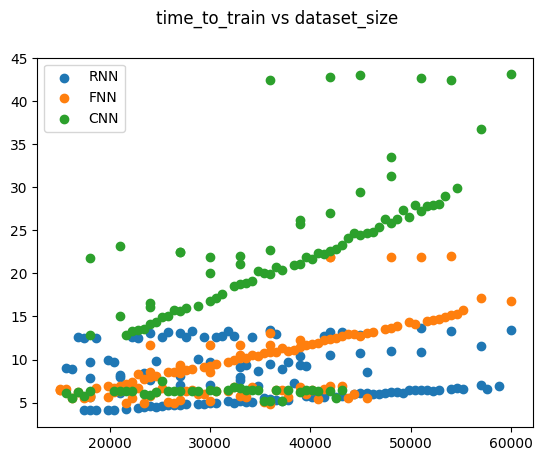

In [212]:
plot_by_col("dataset_size", "time_to_train", "model")

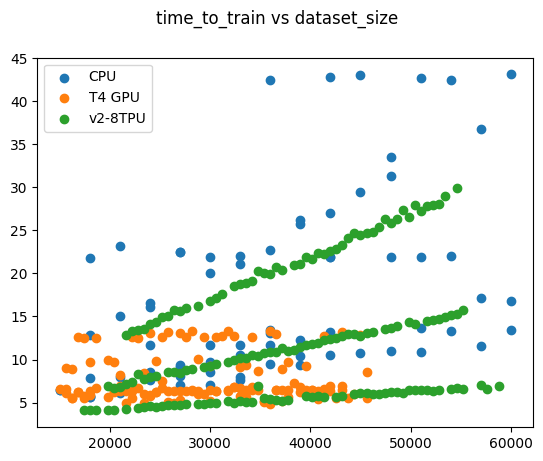

In [213]:
plot_by_col("dataset_size", "time_to_train", "name")

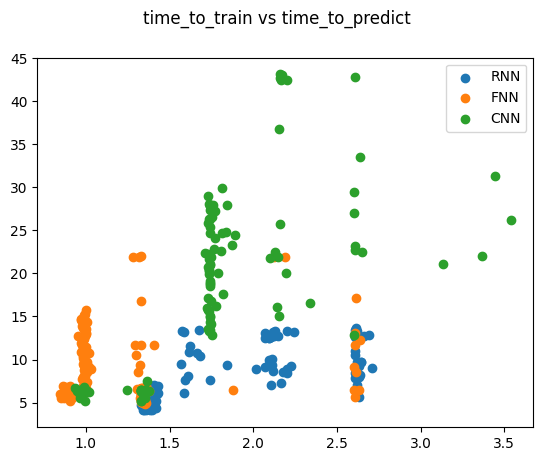

In [214]:
plot_by_col("time_to_predict", "time_to_train", "model")

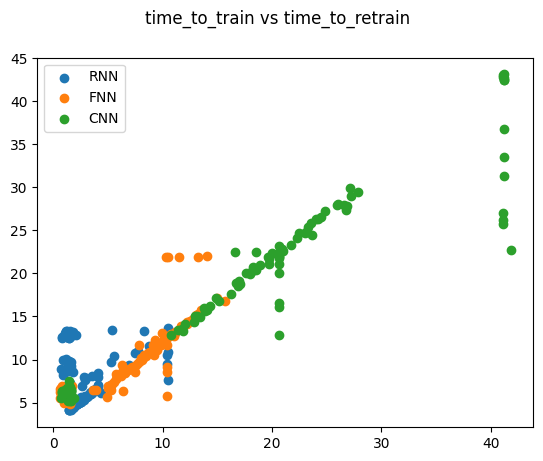

In [215]:
plot_by_col("time_to_retrain", "time_to_train", "model")

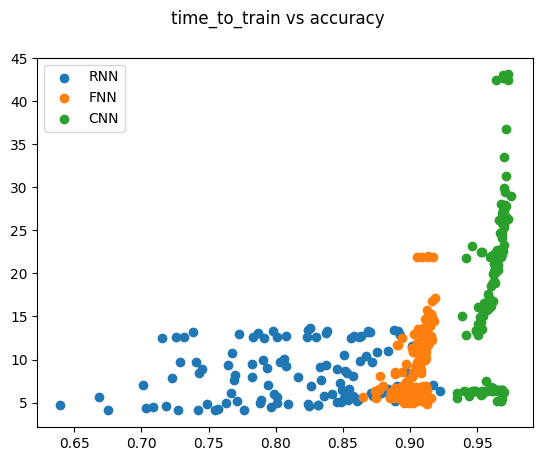

In [216]:
plot_by_col("accuracy", "time_to_train", "model")

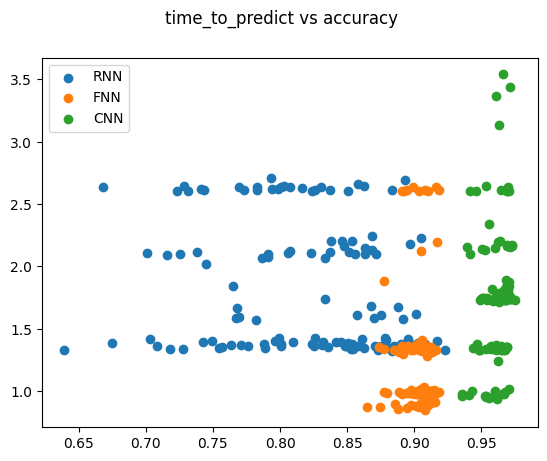

In [217]:
plot_by_col("accuracy", "time_to_predict", "model")

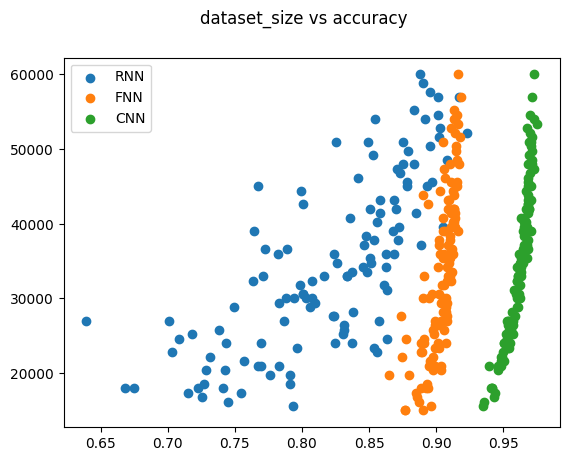

In [218]:
plot_by_col("accuracy", "dataset_size", "model")

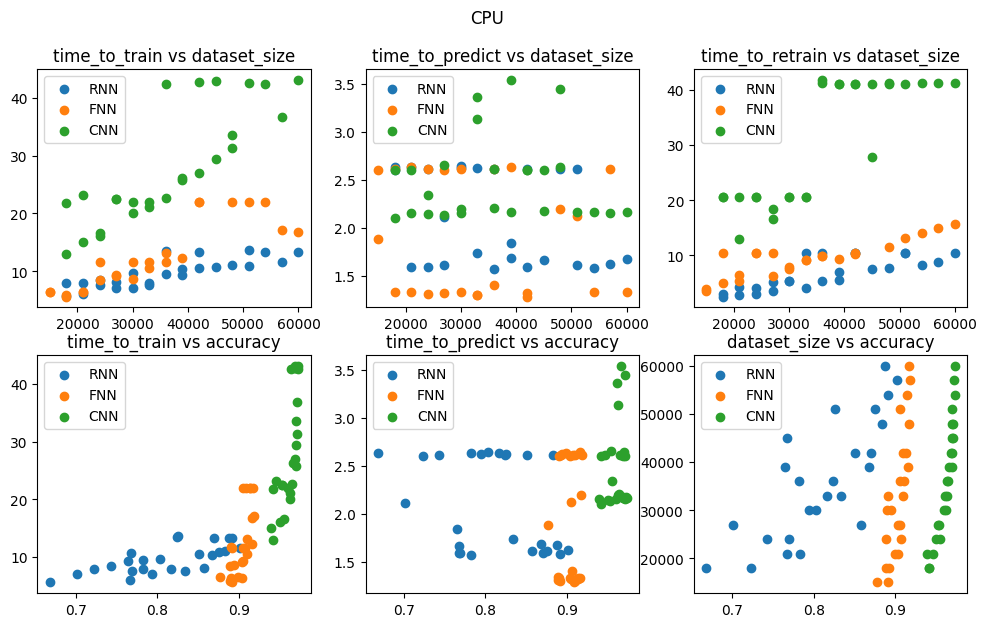

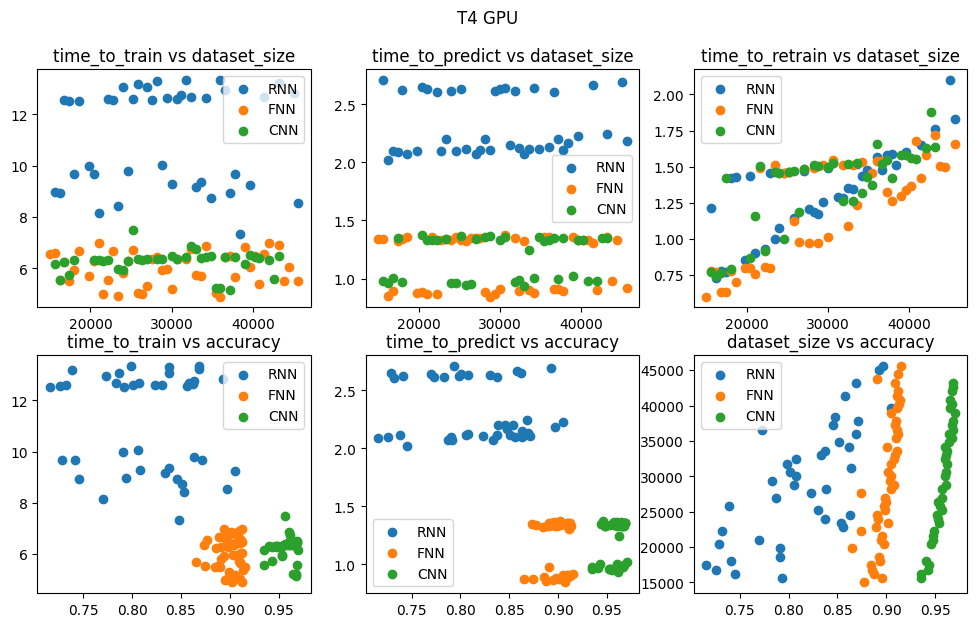

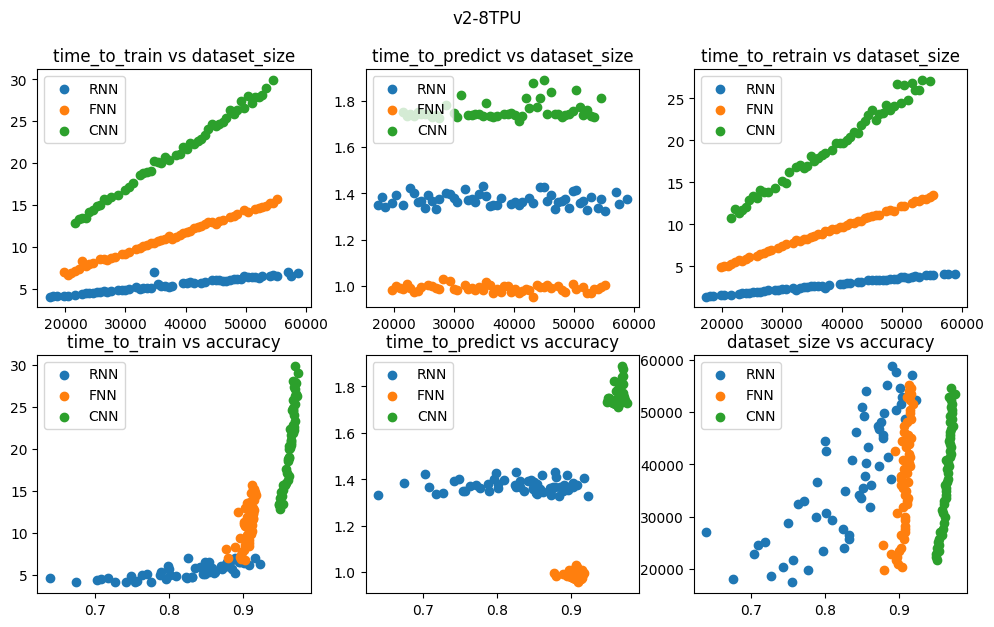

In [219]:

for i in range(len(dfs)):
    plot_model_comparisons(dfs[i])


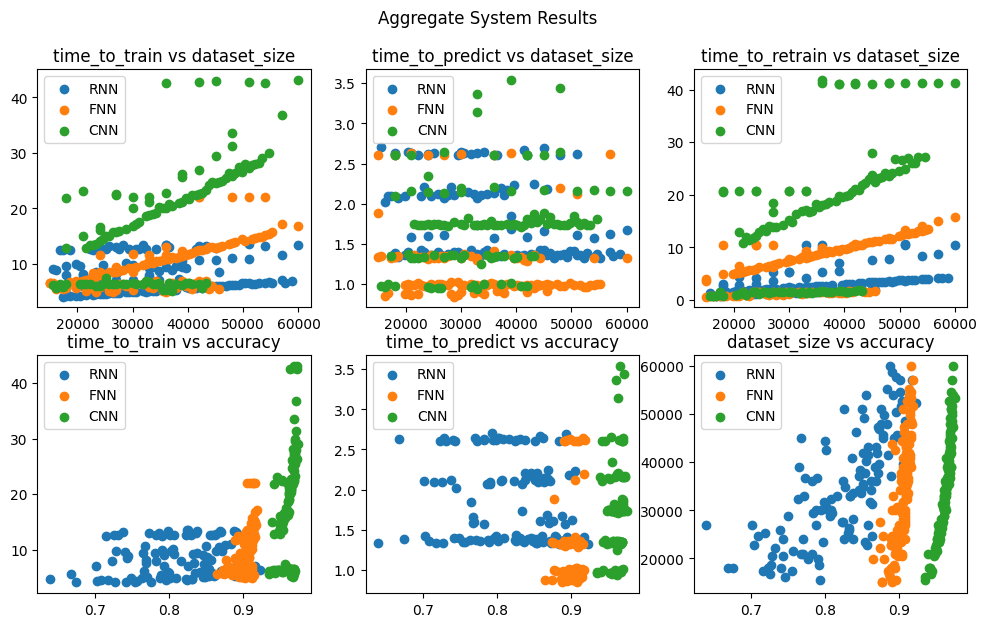

In [220]:
plot_model_comparisons(filtered_df, "Aggregate System Results")

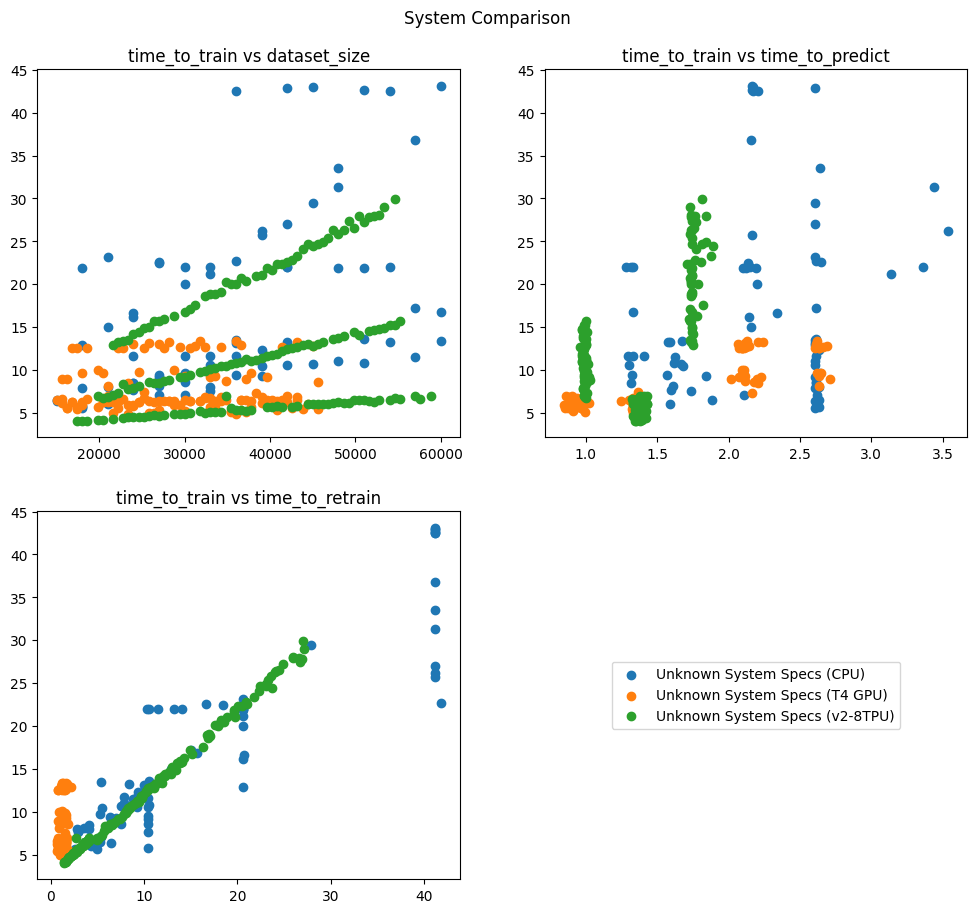

In [221]:
plot_system_comparisons(filtered_df)

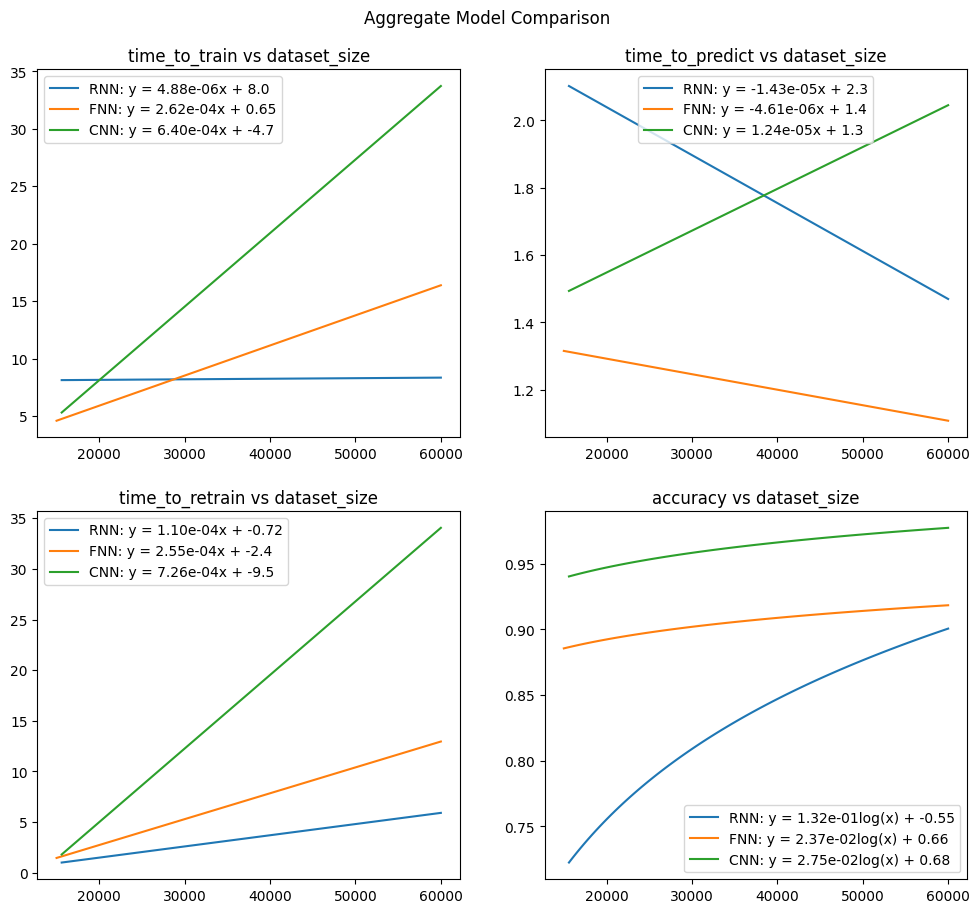

In [222]:
plot_best_fit(filtered_df, "Aggregate Model Comparison")

In [223]:
print_statistics(filtered_df)

RNN - time_to_train: mean: 8.212133593246586 std: 3.0848934269336383 CI95%: (7.664729121493613, 8.759538064999559)
RNN - time_to_retrain: mean: 3.1087883828116243 std: 2.394013253351793 CI95%: (2.683978388119757, 3.5335983775034916)
RNN - time_to_predict: mean: 1.8303171943445675 std: 0.5105475075134138 CI95%: (1.7397221720935154, 1.9209122165956196)
RNN - accuracy: mean: 0.8203704899451771 std: 0.0606068252119704 CI95%: (0.8096160026588008, 0.8311249772315534)
FNN - time_to_train: mean: 9.49345479280718 std: 4.095076697840716 CI95%: (8.772680500051603, 10.214229085562756)
FNN - time_to_retrain: mean: 6.242901727076499 std: 4.440248071793944 CI95%: (5.46137383401063, 7.024429620142368)
FNN - time_to_predict: mean: 1.2285856777621853 std: 0.4522987923359444 CI95%: (1.1489765846450675, 1.3081947708793031)
FNN - accuracy: mean: 0.9033427406703273 std: 0.010773223753094384 CI95%: (0.9014465459701331, 0.9052389353705215)
CNN - time_to_train: mean: 17.768247668639475 std: 10.236673222892074 